# Lab | Imbalanced data

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
import imblearn
#
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE


In [238]:
# To make run all you ask in one cell, not only the last required
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### 1. Load the dataset and explore the variables.

In [239]:
data = pd.read_csv('files_for_lab/customer_churn.csv')
data.head()
data.shape
numerical = data.select_dtypes(np.number)
categorical = data.select_dtypes(np.object)
numerical.shape
categorical.shape

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


(7043, 21)

(7043, 3)

(7043, 18)

### <div class="alert alert-block alert-info"><center><b>We will try to predict variable Churn using a logistic regression on variables Tenure, SeniorCitizen and MonthlyCharges.</b></center></div>






### 2. Extract the target variable.

In [240]:
y = data['Churn']

In [241]:
y = pd.get_dummies(y, columns=['Churn'],drop_first=True)
y.head()

,Yes
0,0
1,0
2,1
3,0
4,1


### 3. Extract the independent variables and scale them.

In [242]:
X = data[['tenure','SeniorCitizen','MonthlyCharges']]
X.describe()

,tenure,SeniorCitizen,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,0.162147,64.761692
std,24.559481,0.368612,30.090047
min,0.000000,0.000000,18.250000
25%,9.000000,0.000000,35.500000
50%,29.000000,0.000000,70.350000
75%,55.000000,0.000000,89.850000
max,72.000000,1.000000,118.750000


In [243]:
# Normalization
MinMaxtransformer = MinMaxScaler().fit(X)
x_normalized = MinMaxtransformer.transform(X)
print(x_normalized.shape)
x_normalized = pd.DataFrame(x_normalized,columns=X.columns)
x_normalized.head()

(7043, 3)


,tenure,SeniorCitizen,MonthlyCharges
0,0.013889,0.0,0.115423
1,0.472222,0.0,0.385075
2,0.027778,0.0,0.354229
3,0.625000,0.0,0.239303
4,0.027778,0.0,0.521891


In [244]:
X.shape
y.shape

(7043, 3)

(7043, 1)

### 4. Build the logistic regression model.

In [245]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [246]:
classification = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)

C:\Users\besca\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### 5. Evaluate the model.

In [247]:
predictions = classification.predict(X_test)
classification.score(X_test, y_test)

0.7825099375354913

In [248]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,predictions)
cf

array([[1165,  133],
       [ 250,  213]], dtype=int64)

In [249]:
pred = classification.predict(X_test)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.615606936416185
recall:  0.46004319654427644
f1:  0.526576019777503


### 6. Even a simple model will give us more than 70% accuracy. Why?

<AxesSubplot:>

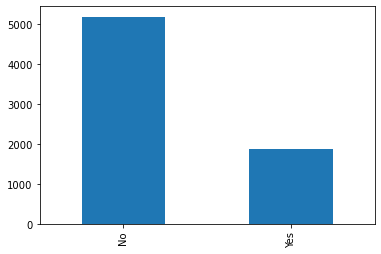

In [250]:
# because the majority of the cases will already result in churn = NO
count_classes = pd.value_counts(data['Churn'])
count_classes.plot(kind = 'bar')

### <div class="alert alert-block alert-info"><center><b>Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points.</b></center></div>







### 7. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [251]:
sm = SMOTE(random_state=100,sampling_strategy='minority',k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train,y_train)

In [252]:
classification1 = LogisticRegression(max_iter=1000)
classification1.fit(X_train_SMOTE, y_train_SMOTE)
pred = classification1.predict(X_test)


classification1.score(X_test, y_test)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

C:\Users\besca\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(max_iter=1000)

0.7120954003407155

precision:  0.4684813753581662
recall:  0.7062634989200864
f1:  0.5633074935400517


In [253]:
cf1 = confusion_matrix(y_test,pred)
cf1

array([[927, 371],
       [136, 327]], dtype=int64)

### 8. Simple oversampling

In [254]:
train = pd.concat([X_train, y_train],axis=1)
train.head()

,tenure,SeniorCitizen,MonthlyCharges,Yes
3296,24,0,49.30,0
6397,54,1,65.25,0
6043,3,0,40.15,1
5309,61,0,20.25,0
3000,12,0,84.45,1


In [255]:
# separate majority/minority classes
no_churn = train[train['Yes'] == 0]
yes_churn = train[train['Yes'] == 1]

In [256]:
# oversample minority
yes_churn_oversampled = resample(yes_churn, #<- sample from here
                                    replace=True, #<- we need replacement, since we don't have enough data otherwise
                                    n_samples = len(no_churn),#<- make both sets the same size
                                    random_state=0)

In [257]:
display(no_churn.shape)
display(yes_churn_oversampled.shape)

(3876, 4)

(3876, 4)

In [258]:
train_oversampled = pd.concat([no_churn,yes_churn_oversampled])
train_oversampled.head()

,tenure,SeniorCitizen,MonthlyCharges,Yes
3296,24,0,49.30,0
6397,54,1,65.25,0
5309,61,0,20.25,0
3101,58,0,79.80,0
2868,26,0,85.75,0


In [259]:
y_train_over = train_oversampled['Yes'].copy()
X_train_over = train_oversampled.drop('Yes',axis = 1).copy()

In [260]:
# Our Logistic Regression, while still not amazing, has improved substantially!
# especially at detecting instances of diabetes
classification2 = LogisticRegression(max_iter=1000)
classification2.fit(X_train_over, y_train_over)
pred = classification2.predict(X_test)

classification2.score(X_test, y_test)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

LogisticRegression(max_iter=1000)

0.7194775695627484

precision:  0.4776978417266187
recall:  0.7170626349892009
f1:  0.5734024179620035


In [261]:
cf2 = confusion_matrix(y_test,pred)
cf2

array([[935, 363],
       [131, 332]], dtype=int64)

In [262]:
cf
cf1
cf2

array([[1165,  133],
       [ 250,  213]], dtype=int64)

array([[927, 371],
       [136, 327]], dtype=int64)

array([[935, 363],
       [131, 332]], dtype=int64)